# Wine Review Analysis

## Install Required Libraries

In [197]:
!pip install pandas
!pip install geopandas matplotlib folium


     ---------------------------------------- 1.1/1.1 MB 14.0 MB/s eta 0:00:00
     ---------------------------------------- 102.3/102.3 kB ? eta 0:00:00
     --------------------------------------- 22.7/22.7 MB 25.1 MB/s eta 0:00:00
     ---------------------------------------- 6.1/6.1 MB 27.8 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 43.8 MB/s eta 0:00:00


## Importing Libraries
###  Libraries and modules for data analysis, geospatial operations, visualization, and email communication.


In [901]:
import pandas as pd  # Import the pandas library for data manipulation and analysis.
import geopandas as gpd  # Import the geopandas library for working with geographic data.
import matplotlib.pyplot as plt  # Import matplotlib for creating data visualizations.
import matplotlib.cm as cm  # Import matplotlib's colormap module for color mapping.
import matplotlib.colors as colors  # Import matplotlib's colors module for color handling.
from shapely.geometry import Point  # Import Point from shapely.geometry for geometry operations.
import numpy as np  # Import numpy for numerical computations.
import warnings  # Import the warnings module for handling warnings.
from collections import Counter  # Import Counter for counting occurrences of items.
from IPython.display import display, Markdown  # Import display and Markdown for rendering Markdown content in IPython.
import os # Import the 'os' module for operating system-related tasks
import smtplib  # For sending emails
from email.mime.multipart import MIMEMultipart  # For creating multipart emails
from email.mime.text import MIMEText  # For adding text content to emails
from email.mime.base import MIMEBase  # For adding binary attachments to emails
from email import encoders  # For encoding attachments


In [1173]:
# Reading data from the specified CSV file and storing it in the variable 'data' as a Pandas DataFrame.
data = pd.read_csv("C:/Users/jefff/Desktop/Python_Wine.Review_Analysis/winemag-data-130k-v2.csv")


In [1174]:
# It provides a summary of the DataFrame's structure and content
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


## Data Cleaning

In [1175]:
# Get a list of unique values in the 'country' column of the DataFrame 'data'
# Null / "NaN" values found in the "country" column.

data['country'].unique().tolist()


['Italy',
 'Portugal',
 'US',
 'Spain',
 'France',
 'Germany',
 'Argentina',
 'Chile',
 'Australia',
 'Austria',
 'South Africa',
 'New Zealand',
 'Israel',
 'Hungary',
 'Greece',
 'Romania',
 'Mexico',
 'Canada',
 nan,
 'Turkey',
 'Czech Republic',
 'Slovenia',
 'Luxembourg',
 'Croatia',
 'Georgia',
 'Uruguay',
 'England',
 'Lebanon',
 'Serbia',
 'Brazil',
 'Moldova',
 'Morocco',
 'Peru',
 'India',
 'Bulgaria',
 'Cyprus',
 'Armenia',
 'Switzerland',
 'Bosnia and Herzegovina',
 'Ukraine',
 'Slovakia',
 'Macedonia',
 'China',
 'Egypt']

In [1176]:
# Rows with null("NaN") values across 'country' column ONLY 
data[data['country'].isna()]


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
913,913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines
3131,3131,NaN,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,NaN,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier
4243,4243,NaN,"Violet-red in color, this semisweet wine has a...",Red Naturally Semi-Sweet,88,18.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Kakhetia Traditional Winemaking 2012 Red Natur...,Ojaleshi,Kakhetia Traditional Winemaking
9509,9509,NaN,This mouthwatering blend starts with a nose of...,Theopetra Malagouzia-Assyrtiko,92,28.0,NaN,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2015 Theopetra Malagouzia-Assyrtiko W...,White Blend,Tsililis
9750,9750,NaN,This orange-style wine has a cloudy yellow-gol...,Orange Nikolaevo Vineyard,89,28.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Ross-idi 2015 Orange Nikolaevo Vineyard Chardo...,Chardonnay,Ross-idi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124176,124176,NaN,This Swiss red blend is composed of four varie...,Les Romaines,90,30.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Les Frères Dutruy 2014 Les Romaines Red,Red Blend,Les Frères Dutruy
129407,129407,NaN,Dry spicy aromas of dusty plum and tomato add ...,Reserve,89,22.0,NaN,NaN,NaN,Michael Schachner,@wineschach,El Capricho 2015 Reserve Cabernet Sauvignon,Cabernet Sauvignon,El Capricho
129408,129408,NaN,El Capricho is one of Uruguay's more consisten...,Reserve,89,22.0,NaN,NaN,NaN,Michael Schachner,@wineschach,El Capricho 2015 Reserve Tempranillo,Tempranillo,El Capricho
129590,129590,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Büyülübağ 2012 Shah Red,Red Blend,Büyülübağ


In [1177]:
# Rows with null("NaN") values across ALL columns 
data[data.isna().any(axis=1)]

# Null("NaN") values exist in multiple columns, not limited to just the "country" column.


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [1178]:
# List of column names where 'NaN' values should be replaced with 'unknown' (except in the 'price' and 'points' columns.)
columns_to_fillna = ['country', 'description', 'designation', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery']

# Replace 'NaN' values with 'unknown' in the specified columns
data[columns_to_fillna] = data[columns_to_fillna].fillna('unknown')


In [1179]:
# Checking if the data was cleaned after replacing all nuLL("NAN") values in the DataFrame 'data' with the string 'unknown' in place
data[data.isna().any(axis=1)]


# No more null ('NaN') values found, except in the 'price' and 'points' column.


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,unknown,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
13,13,Italy,This is dominated by oak and oak-driven aromas...,Rosso,87,NaN,Sicily & Sardinia,Etna,unknown,Kerin O’Keefe,@kerinokeefe,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Masseria Setteporte
30,30,France,Red cherry fruit comes laced with light tannin...,Nouveau,86,NaN,Beaujolais,Beaujolais-Villages,unknown,Roger Voss,@vossroger,Domaine de la Madone 2012 Nouveau (Beaujolais...,Gamay,Domaine de la Madone
31,31,Italy,Merlot and Nero d'Avola form the base for this...,Calanìca Nero d'Avola-Merlot,86,NaN,Sicily & Sardinia,Sicilia,unknown,unknown,unknown,Duca di Salaparuta 2010 Calanìca Nero d'Avola-...,Red Blend,Duca di Salaparuta
32,32,Italy,"Part of the extended Calanìca series, this Gri...",Calanìca Grillo-Viognier,86,NaN,Sicily & Sardinia,Sicilia,unknown,unknown,unknown,Duca di Salaparuta 2011 Calanìca Grillo-Viogni...,White Blend,Duca di Salaparuta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129844,129844,Italy,"Doga delle Clavule is a neutral, mineral-drive...",Doga delle Clavule,86,NaN,Tuscany,Morellino di Scansano,unknown,unknown,unknown,Caparzo 2006 Doga delle Clavule (Morellino di...,Sangiovese,Caparzo
129860,129860,Portugal,This rich wine has a firm structure as well as...,Pacheca Superior,90,NaN,Douro,unknown,unknown,Roger Voss,@vossroger,Quinta da Pacheca 2013 Pacheca Superior Red (D...,Portuguese Red,Quinta da Pacheca
129863,129863,Portugal,This mature wine that has 50% Touriga Nacional...,Reserva,90,NaN,Dão,unknown,unknown,Roger Voss,@vossroger,Seacampo 2011 Reserva Red (Dão),Portuguese Red,Seacampo
129893,129893,Italy,"Aromas of passion fruit, hay and a vegetal not...",Corte Menini,91,NaN,Veneto,Soave Classico,unknown,Kerin O’Keefe,@kerinokeefe,Le Mandolare 2015 Corte Menini (Soave Classico),Garganega,Le Mandolare


## Exploratory Analysis

### Dataset Overview

In [1180]:
data

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,unknown,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,unknown,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,unknown,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,unknown,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,unknown,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.0,Alsace,Alsace,unknown,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


### Dataset Overview ( First 5 rows)

In [1181]:
# Display the first few rows of the DataFrame 'data'
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,unknown,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,unknown,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,unknown,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### Dataset Overview ( Last 5 rows)

In [1182]:
# Display the last few rows of the DataFrame 'data'
data.tail()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,unknown,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,unknown,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.0,Alsace,Alsace,unknown,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,unknown,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


In [1183]:
# Display the dimensions (number of rows and columns) of the DataFrame 'data'
data.shape

(129971, 14)

In [1184]:
# Generate summary statistics for the DataFrame 'data' using the describe() method
stat_summary = data.describe()

stat_summary

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


## Country x Frequency of Appearance

### All Countries

In [1185]:
# Count the occurrences of each country and store the frequencies
country_freq = data['country'].value_counts()

# Reset the index to have country names as a column
country_freq = country_freq.reset_index()

# Rename the columns for better readability, specifically 'Frequency of Appearance'
country_freq.columns = ['Country', 'Frequency of Appearance']

# Set the index to start from 1
country_freq.index = country_freq.index + 1

# Display the frequencies of each country's appearance
country_freq



,Country,Frequency of Appearance
1,US,54504
2,France,22093
3,Italy,19540
4,Spain,6645
5,Portugal,5691
6,Chile,4472
7,Argentina,3800
8,Austria,3345
9,Australia,2329
10,Germany,2165


### Top 10 Country x Frequency of Appearance
####  Graphic Visualization

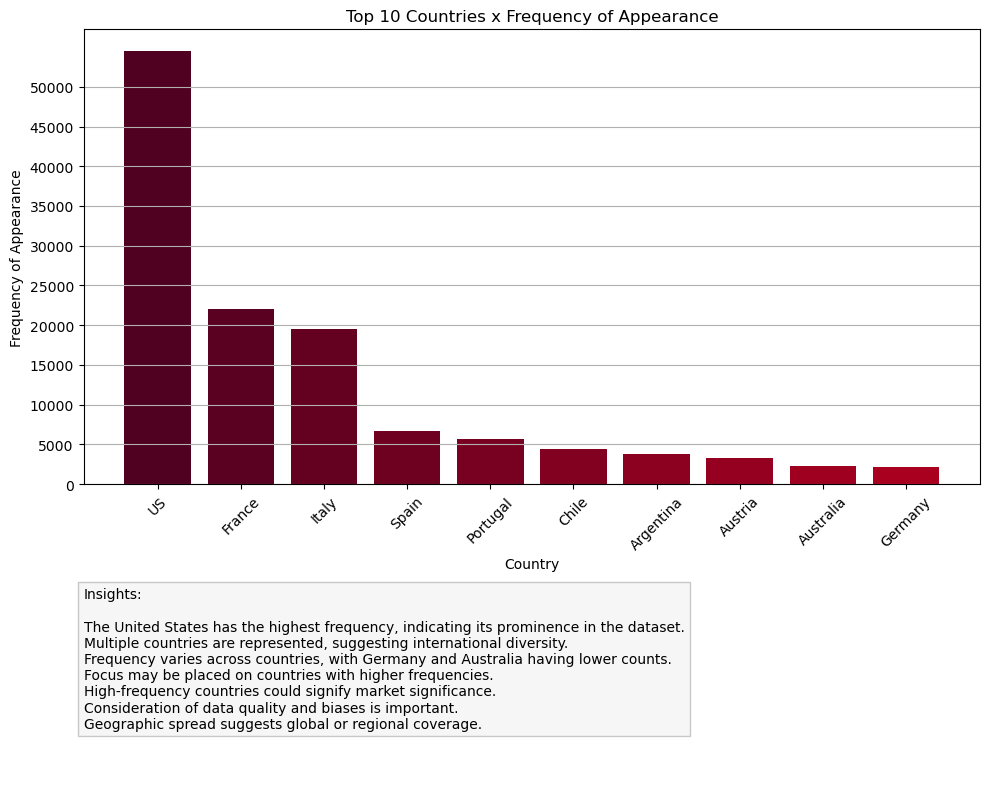

In [1186]:
# Given data, list of tuples
data_freq = {
    "Country": ["US", "France", "Italy", "Spain", "Portugal", "Chile", "Argentina", "Austria", "Australia", "Germany"],
    "Value": [54504, 22093, 19540, 6645, 5691, 4472, 3800, 3345, 2329, 2165]
}

# Convert data to a DataFrame
df_freq = pd.DataFrame(data_freq)

# Define the base wine color
base_wine_color = "#800020"  # Hex color code for a wine color

# Define the number of nuances
num_nuances = len(df_freq)

# Create a range of colors with different nuances
wine_colors = [base_wine_color.replace("80", f"{80 + i * 10:02X}") for i in range(num_nuances)]

# Create a figure and two subplots: one for the bar chart and one for the text box below it
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [4, 1]})

# Create the bar chart in the first subplot
ax1.bar(df_freq["Country"], df_freq["Value"], color=wine_colors, label='Data Points')

# Customize the plot
ax1.set_title('Top 10 Countries x Frequency of Appearance')
ax1.set_xlabel('Country')
ax1.set_ylabel('Frequency of Appearance')
ax1.grid(axis='y')  # Show grid lines on the y-axis

# Set the x-axis tick locations and labels
xtick_positions = range(len(df_freq["Country"]))
xtick_labels = df_freq["Country"]
ax1.set_xticks(xtick_positions)
ax1.set_xticklabels(xtick_labels, rotation=45)

# Adjust the Y-axis tick marks to be at intervals of 5,000
ax1.set_yticks(range(0, max(df_freq["Value"]) + 1, 5000))

insights_text3 = '''Insights:

The United States has the highest frequency, indicating its prominence in the dataset.
Multiple countries are represented, suggesting international diversity.
Frequency varies across countries, with Germany and Australia having lower counts.
Focus may be placed on countries with higher frequencies.
High-frequency countries could signify market significance.
Consideration of data quality and biases is important.
Geographic spread suggests global or regional coverage.'''

# Add the formatted text box for insights in the second subplot
ax2.text(0.0, 0.45, insights_text3, fontsize=10, bbox=dict(facecolor='lightgray', alpha=0.2))

# Remove x and y axes labels for the second subplot
ax2.axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


## Wine Varieties x  Frequency of Appearance

### Top 50 Wine Varieties x Frequency of Appearance

In [1187]:
# Count the occurrences of each wine variety and select the top 50
top50_wine_variety = data['variety'].value_counts().head(50)

# Reset the index to have variety names as a column
top50_wine_variety = top50_wine_variety.reset_index()

# Rename the columns for better readability
top50_wine_variety.columns = ['Variety', 'Count']

# Set the index to start from 1
top50_wine_variety.index = top50_wine_variety.index + 1

# Display the top 50 wine varieties along with their counts
top50_wine_variety



,Variety,Count
1,Pinot Noir,13272
2,Chardonnay,11753
3,Cabernet Sauvignon,9472
4,Red Blend,8946
5,Bordeaux-style Red Blend,6915
6,Riesling,5189
7,Sauvignon Blanc,4967
8,Syrah,4142
9,Rosé,3564
10,Merlot,3102


### Top 10 Wine Varieties x  Frequency of Appearance
####  Graphic Visualization

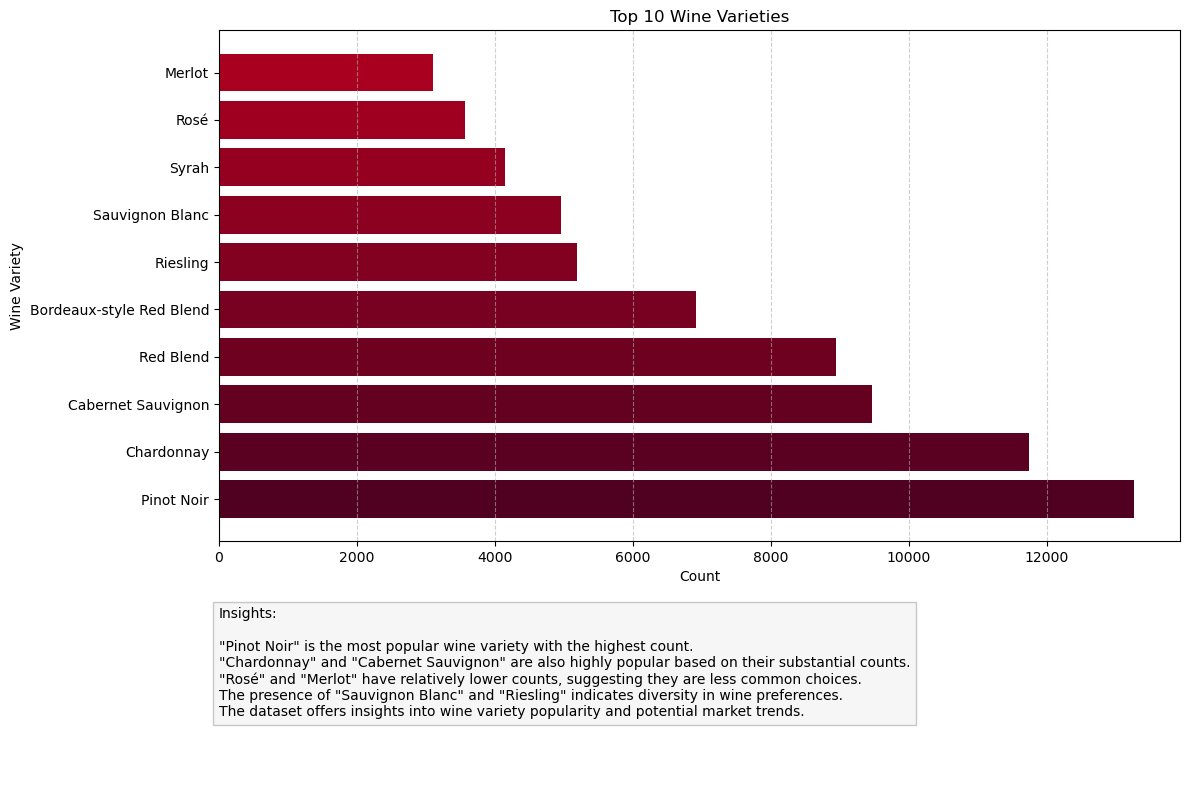

In [1188]:
# Given data
data_wine = {
    "Variety": [
        "Pinot Noir", "Chardonnay", "Cabernet Sauvignon", "Red Blend",
        "Bordeaux-style Red Blend", "Riesling", "Sauvignon Blanc",
        "Syrah", "Rosé", "Merlot"
    ],
    "Count": [13272, 11753, 9472, 8946, 6915, 5189, 4967, 4142, 3564, 3102]
}

# Convert data to a DataFrame
df_wine = pd.DataFrame(data_wine)

# Define the base wine color
base_wine_color = "#800020"  # Hex color code for a wine color

# Define the number of nuances
num_nuances = len(df_wine)

# Create a range of colors with different nuances
wine_colors = [base_wine_color.replace("80", f"{80 + i * 10:02X}") for i in range(num_nuances)]

# Create a figure with subplots and increase the figsize
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 8), gridspec_kw={'height_ratios': [4, 1]})

# Create the bar chart in the first subplot with grid on x-axis
ax1.barh(df_wine["Variety"], df_wine["Count"], color=wine_colors, label='Data Points')
ax1.set_title('Top 10 Wine Varieties')
ax1.set_xlabel('Count')
ax1.set_ylabel('Wine Variety')

# Enable grid on x-axis
ax1.xaxis.grid(True, linestyle='--', alpha=0.6)

insights_text2 = '''Insights:

"Pinot Noir" is the most popular wine variety with the highest count.
"Chardonnay" and "Cabernet Sauvignon" are also highly popular based on their substantial counts.
"Rosé" and "Merlot" have relatively lower counts, suggesting they are less common choices.
The presence of "Sauvignon Blanc" and "Riesling" indicates diversity in wine preferences.
The dataset offers insights into wine variety popularity and potential market trends.'''

# Add the formatted text box for insights in the second subplot
ax2.text(0.0, 0.5, insights_text2, fontsize=10, bbox=dict(facecolor='lightgray', alpha=0.2), transform=ax2.transAxes)
ax2.axis('off')  # Turn off axis for the second subplot

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


## Most Expensive Wines
### Top 50 Most Expensive Wines

In [1189]:
# provides a subset of the data that includes the country, province, variety, points, and price of the top 50 wines with the highest prices, prioritizing wines with the same price by their points.
top_50_most_expensive = data[['country', 'province', 'variety','price','points' ]].sort_values(by=['price', 'points'], ascending=False).head(50)

# Display the DataFrame containing the top 50 most expensive wines
top_50_most_expensive


,country,province,variety,price,points
80290,France,Bordeaux,Bordeaux-style Red Blend,3300.0,88
15840,France,Bordeaux,Bordeaux-style Red Blend,2500.0,96
98380,France,Burgundy,Pinot Noir,2500.0,96
120391,US,California,Chardonnay,2013.0,91
65352,France,Bordeaux,Bordeaux-style Red Blend,2000.0,97
113564,France,Burgundy,Pinot Noir,2000.0,96
1558,France,Bordeaux,Bordeaux-style Red Blend,1900.0,98
111753,France,Bordeaux,Bordeaux-style Red Blend,1500.0,100
111755,France,Bordeaux,Bordeaux-style Red Blend,1500.0,100
1575,France,Bordeaux,Bordeaux-style Red Blend,1300.0,96


### Top 10 Countries with the Most Expensive Wines(Count) x Average Prices
####  Graphic Visualization


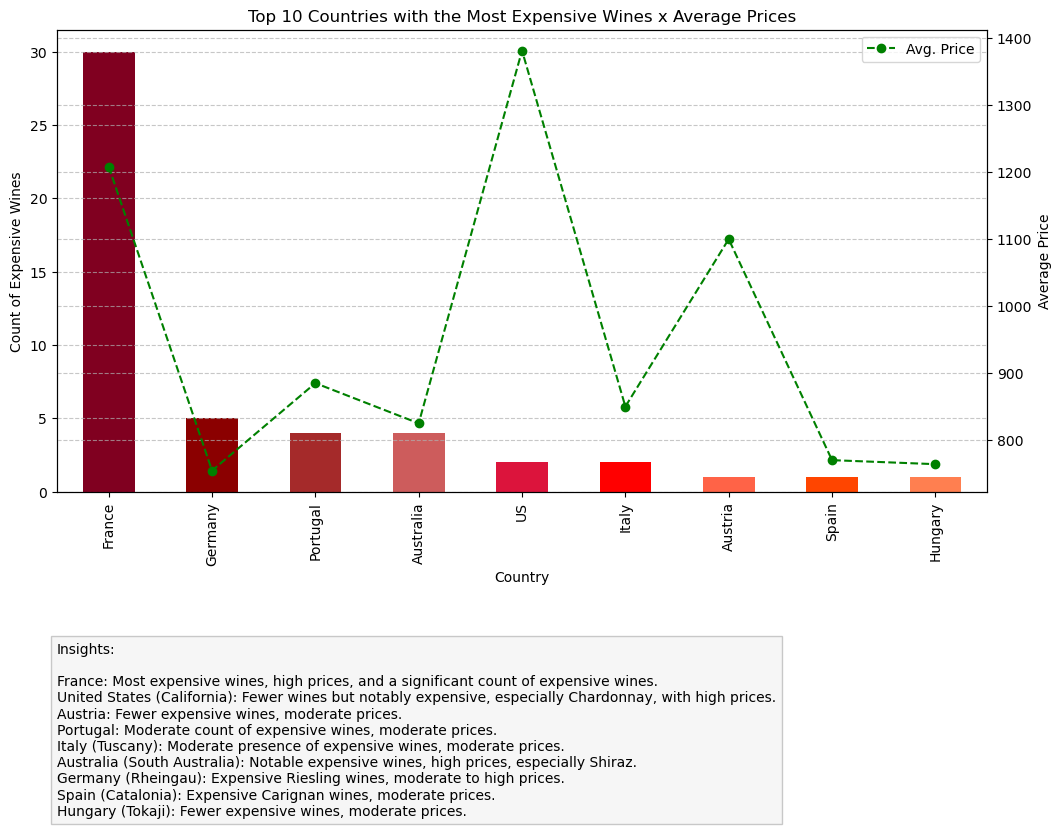

In [1190]:
# Sample data as list of tuples
data_expensive = [
    (80290, "France", "Bordeaux", "Bordeaux-style Red Blend", 3300.0, 88),
    (15840, "France", "Bordeaux", "Bordeaux-style Red Blend", 2500.0, 96),
    (98380, "France", "Burgundy", "Pinot Noir", 2500.0, 96),
    (120391, "US", "California", "Chardonnay", 2013.0, 91),
    (65352, "France", "Bordeaux", "Bordeaux-style Red Blend", 2000.0, 97),
    (113564, "France", "Burgundy", "Pinot Noir", 2000.0, 96),
    (1558, "France", "Bordeaux", "Bordeaux-style Red Blend", 1900.0, 98),
    (111753, "France", "Bordeaux", "Bordeaux-style Red Blend", 1500.0, 100),
    (111755, "France", "Bordeaux", "Bordeaux-style Red Blend", 1500.0, 100),
    (1575, "France", "Bordeaux", "Bordeaux-style Red Blend", 1300.0, 96),
    (1571, "France", "Bordeaux", "Bordeaux-style Red Blend", 1200.0, 96),
    (113581, "France", "Burgundy", "Pinot Noir", 1125.0, 94),
    (1566, "France", "Bordeaux", "Bordeaux-style Red Blend", 1100.0, 97),
    (89478, "Austria", "Wachau", "Grüner Veltliner", 1100.0, 94),
    (36531, "Portugal", "Port", "Port", 1000.0, 97),
    (69516, "France", "Bordeaux", "Bordeaux-style White Blend", 1000.0, 94),
    (41441, "Portugal", "Port", "Port", 980.0, 94),
    (84820, "France", "Burgundy", "Pinot Noir", 973.0, 95),
    (54298, "France", "Bordeaux", "Bordeaux-style White Blend", 932.0, 97),
    (88870, "Italy", "Tuscany", "Sangiovese Grosso", 900.0, 94),
    (30110, "France", "Burgundy", "Chardonnay", 886.0, 97),
    (56953, "Australia", "South Australia", "Shiraz", 850.0, 99),
    (77028, "Australia", "South Australia", "Shiraz", 850.0, 98),
    (124430, "France", "Bordeaux", "Bordeaux-style Red Blend", 850.0, 95),
    (122935, "France", "Bordeaux", "Bordeaux-style White Blend", 848.0, 100),
    (56959, "Australia", "South Australia", "Shiraz", 820.0, 96),
    (36529, "France", "Champagne", "Chardonnay", 800.0, 99),
    (39288, "France", "Bordeaux", "Bordeaux-style White Blend", 800.0, 98),
    (113930, "France", "Bordeaux", "Bordeaux-style White Blend", 800.0, 97),
    (108484, "Italy", "Tuscany", "Sangiovese", 800.0, 94),
    (97150, "France", "Loire Valley", "Rosé", 800.0, 87),
    (78235, "Portugal", "Port", "Port", 790.0, 87),
    (39627, "Australia", "South Australia", "Shiraz", 780.0, 91),
    (16522, "Germany", "Rheingau", "Riesling", 775.0, 98),
    (347, "Germany", "Rheingau", "Riesling", 775.0, 97),
    (43650, "Germany", "Rheingau", "Riesling", 775.0, 95),
    (43655, "Germany", "Rheingau", "Riesling", 775.0, 95),
    (15846, "Spain", "Catalonia", "Carignan", 770.0, 96),
    (90583, "Portugal", "Port", "Port", 770.0, 93),
    (54305, "France", "Bordeaux", "Bordeaux-style White Blend", 767.0, 96),
    (49326, "Hungary", "Tokaji", "Furmint", 764.0, 94),
    (82751, "France", "Burgundy", "Chardonnay", 757.0, 98),
    (51978, "US", "California", "Syrah", 750.0, 92),
    (30131, "France", "Burgundy", "Chardonnay", 710.0, 95),
    (15833, "France", "Bordeaux", "Bordeaux-style White Blend", 698.0, 97),
    (21079, "France", "Bordeaux", "Bordeaux-style Red Blend", 685.0, 96),
    (84807, "France", "Burgundy", "Chardonnay", 685.0, 95),
    (96148, "France", "Champagne", "Chardonnay", 675.0, 92),
    (122424, "Germany", "Rheingau", "Riesling", 672.0, 96),
    (108645, "France", "Bordeaux", "Bordeaux-style Red Blend", 660.0, 97)
]

# Create a DataFrame
df_expensive = pd.DataFrame(data_expensive, columns=["ID", "Country", "Region", "Variety", "Price", "Rating"])

# Sort the DataFrame by Price in descending order
df_sorted = df_expensive.sort_values(by="Price", ascending=False)

# Group by Country and count the number of expensive wines
country_counts = df_sorted["Country"].value_counts()

# Calculate the average price for each country
country_avg_prices = df_sorted.groupby("Country")["Price"].mean()

# Select the top N countries (e.g., top 10)
top_N = 10
top_countries = country_counts.head(top_N)

# Define a range of wine colors (different nuances)
wine_colors = ['#800020', '#8B0000', '#A52A2A', '#CD5C5C', '#DC143C',
               '#FF0000', '#FF6347', '#FF4500', '#FF7F50', '#FFA07A']

# Create a bar graph with different nuances of wine color and lines for average price
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the count of expensive wines as bars
top_countries.plot(kind="bar", color=wine_colors, ax=ax1)
ax1.set_ylabel("Count of Expensive Wines")
ax1.set_xlabel("Country")

# Create a second y-axis for the average price as lines
ax2 = ax1.twinx()
ax2.plot(top_countries.index, country_avg_prices[top_countries.index], marker='o', color='g', linestyle='--', label="Avg. Price")
ax2.set_ylabel("Average Price")
ax2.legend(loc="upper right")

# Add a grid to both y-axes (matching the primary y-axis)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.title(f"Top {top_N} Countries with the Most Expensive Wines x Average Prices")
plt.xticks(rotation=45)

insights_text1 = '''Insights:

France: Most expensive wines, high prices, and a significant count of expensive wines.
United States (California): Fewer wines but notably expensive, especially Chardonnay, with high prices.
Austria: Fewer expensive wines, moderate prices.
Portugal: Moderate count of expensive wines, moderate prices.
Italy (Tuscany): Moderate presence of expensive wines, moderate prices.
Australia (South Australia): Notable expensive wines, high prices, especially Shiraz.
Germany (Rheingau): Expensive Riesling wines, moderate to high prices.
Spain (Catalonia): Expensive Carignan wines, moderate prices.
Hungary (Tokaji): Fewer expensive wines, moderate prices.'''

# Add the formatted text box for insights
ax1.text(0.00, -0.70, insights_text1, transform=ax1.transAxes, fontsize=10, bbox=dict(facecolor='lightgray', alpha=0.2))


plt.show()

### Geospatial Approach - Top 10 Countries with the Most Expensive Wines
####  Map Visualization

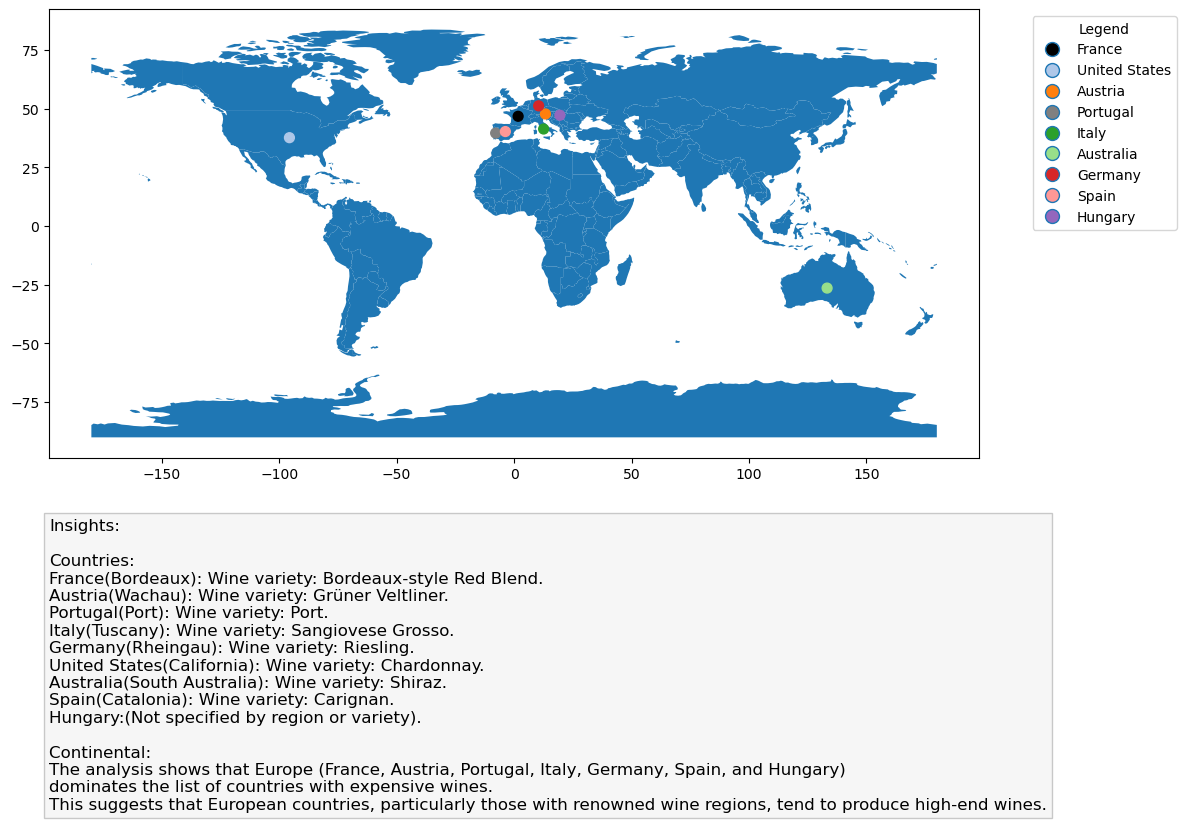

In [1191]:
# Filter out the VisibleDeprecationWarning
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)


# Create a list of colors for each point
point_colors = [country_colors[country] if country not in ["France", "Portugal"] else 'black' if country == "France" else 'grey' for country in df_dd["Country"]]



# Sample data with DD coordinates
data_gps = [
    ("France", "Bordeaux", "Bordeaux-style Red Blend", "3300.0", "88", 46.71109, 1.7191036),
    ("United States", "California", "Chardonnay", "2013.0", "91", 37.6, -95.665),
    ("Austria", "Wachau", "Grüner Veltliner", "1100.0", "94", 47.6964719, 13.3457347),
    ("Portugal", "Port", "Port", "1000.0", "97", 39.557191, -7.8536599),
    ("Italy", "Tuscany", "Sangiovese Grosso", "900.0", "94", 41.29246, 12.5736108),
    ("Australia", "South Australia", "Shiraz", "850.0", "99", -26.4390917, 133.281323),
    ("Germany", "Rheingau", "Riesling", "775.0", "98", 51.1642292, 10.4541194),
    ("Spain", "Catalonia", "Carignan", "770.0", "96", 40.2085, -3.713),
    ("Hungary", "N/A", "N/A", "N/A", "N/A", 47.1611615, 19.5057541),
]

# Create a DataFrame with DD coordinates
df_dd = pd.DataFrame(data_gps, columns=["Country", "province", "variety", "Price", "points", "Latitude_DD", "Longitude_DD"])

# Create a GeoDataFrame with points
gdf = gpd.GeoDataFrame(df_dd, geometry=[Point(x, y) for x, y in zip(df_dd["Longitude_DD"], df_dd["Latitude_DD"])])

# Define a colormap for countries
unique_countries = df_dd["Country"].unique()
colors = plt.cm.tab20.colors[:len(unique_countries)]

# Create a dictionary to map countries to colors
country_colors = dict(zip(unique_countries, colors))


# Create a list of colors for each point
point_colors = [country_colors[country] if country not in ["France", "Portugal"] else 'black' if country == "France" else 'grey' for country in df_dd["Country"]]


# Create custom legend labels with additional information
legend_labels = []
for country in unique_countries:
    legend_label = Line2D([0], [0], marker='o', label=country, linestyle='None', markersize=10, markerfacecolor=country_colors[country])
    if country == "France":
        legend_label.set_markerfacecolor('black')  # Set the legend marker color for France to black
    elif country == "Portugal":
        legend_label.set_markerfacecolor('grey')  # Set the legend marker color for Portugal to grey
    legend_labels.append(legend_label)


# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Create a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a grid with two rows (map and text box)
fig, (ax_map, ax_text) = plt.subplots(nrows=2, figsize=(12, 10), gridspec_kw={'height_ratios': [8, 1]})

# Plot the world map and overlay the GeoDataFrame with colored points
world.plot(ax=ax_map)
gdf.plot(ax=ax_map, markersize=50, color=point_colors, marker='o', label='Most Expensive Wines')

# Add a legend with custom labels
ax_map.legend(handles=legend_labels, loc='upper left', title='Legend', bbox_to_anchor=(1.05, 1))

# Create a text box for the additional information
info_text = '''Insights:

Countries:
France(Bordeaux): Wine variety: Bordeaux-style Red Blend.
Austria(Wachau): Wine variety: Grüner Veltliner.
Portugal(Port): Wine variety: Port.
Italy(Tuscany): Wine variety: Sangiovese Grosso.
Germany(Rheingau): Wine variety: Riesling.
United States(California): Wine variety: Chardonnay.
Australia(South Australia): Wine variety: Shiraz.
Spain(Catalonia): Wine variety: Carignan.
Hungary:(Not specified by region or variety).

Continental: 
The analysis shows that Europe (France, Austria, Portugal, Italy, Germany, Spain, and Hungary) 
dominates the list of countries with expensive wines. 
This suggests that European countries, particularly those with renowned wine regions, tend to produce high-end wines.'''
ax_text.text(0.00, -1.5, info_text, fontsize=12, bbox=dict(facecolor='lightgray', alpha=0.2))

# Hide the axes for a cleaner look
ax_map.axis()
ax_text.axis('off')

# Show the map
plt.show()


## The highest-ranked wines
### Top 50 wines with the highest points and price values

In [1192]:
# Provides a subset of the data that includes the country, province, region, points, and price of the top 50 wines with the highest points and price values
top_50_global_country_province_points = data[['country', 'province','region_1', 'points', 'price']].sort_values(by=['points', 'price'], ascending=False).head(50)

top_50_global_country_province_points

,country,province,region_1,points,price
111753,France,Bordeaux,Pauillac,100,1500.0
111755,France,Bordeaux,Saint-Émilion,100,1500.0
122935,France,Bordeaux,Pessac-Léognan,100,848.0
114972,Portugal,Port,unknown,100,650.0
89729,France,Champagne,Champagne,100,617.0
45781,Italy,Tuscany,Brunello di Montalcino,100,550.0
39286,Italy,Tuscany,Toscana,100,460.0
42197,Portugal,Douro,unknown,100,450.0
118058,US,California,Sonoma County,100,450.0
111756,France,Bordeaux,Saint-Julien,100,359.0


### Top 5 Countries with the Highest Wine Prices x Highest Wine Average Points
#### Graphic Visualization

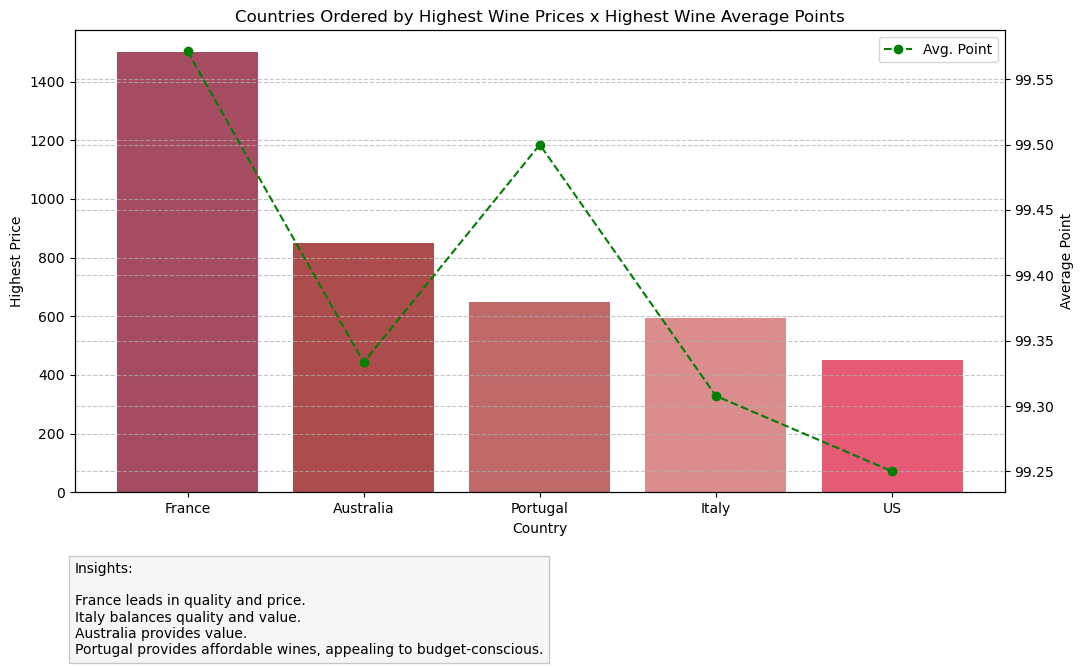

In [1193]:

# data as list of tuples
data_points = [
    (111753, "France", "Bordeaux", "Pauillac", 100, 1500.0),
    (111755, "France", "Bordeaux", "Saint-Émilion", 100, 1500.0),
    (122935, "France", "Bordeaux", "Pessac-Léognan", 100, 848.0),
    (114972, "Portugal", "Port", "unknown", 100, 650.0),
    (89729, "France", "Champagne", "Champagne", 100, 617.0),
    (45781, "Italy", "Tuscany", "Brunello di Montalcino", 100, 550.0),
    (39286, "Italy", "Tuscany", "Toscana", 100, 460.0),
    (42197, "Portugal", "Douro", "unknown", 100, 450.0),
    (118058, "US", "California", "Sonoma County", 100, 450.0),
    (111756, "France", "Bordeaux", "Saint-Julien", 100, 359.0),
    (345, "Australia", "Victoria", "Rutherglen", 100, 350.0),
    (111754, "Italy", "Tuscany", "Brunello di Montalcino", 100, 270.0),
    (36528, "France", "Champagne", "Champagne", 100, 259.0),
    (89728, "France", "Champagne", "Champagne", 100, 250.0),
    (7335, "Italy", "Tuscany", "Vin Santo di Montepulciano", 100, 210.0),
    (45798, "US", "California", "Napa Valley", 100, 200.0),
    (58352, "France", "Bordeaux", "Saint-Julien", 100, 150.0),
    (113929, "US", "Washington", "Columbia Valley (WA)", 100, 80.0),
    (123545, "US", "Washington", "Walla Walla Valley (WA)", 100, 80.0),
    (56953, "Australia", "South Australia", "South Australia", 99, 850.0),
    (36529, "France", "Champagne", "Champagne", 99, 800.0),
    (44994, "Italy", "Piedmont", "Barolo", 99, 595.0),
    (98375, "France", "Burgundy", "Bâtard-Montrachet", 99, 560.0),
    (60880, "Italy", "Piedmont", "Langhe", 99, 440.0),
    (60881, "Italy", "Piedmont", "Langhe", 99, 440.0),
    (56043, "Portugal", "Douro", "unknown", 99, 426.0),
    (39287, "Italy", "Tuscany", "Toscana", 99, 320.0),
    (109427, "Australia", "Victoria", "Rutherglen", 99, 300.0),
    (116140, "US", "California", "Napa Valley", 99, 300.0),
    (121884, "US", "California", "Napa Valley", 99, 290.0),
    (114973, "Portugal", "Port", "unknown", 99, 268.0),
    (79104, "Italy", "Tuscany", "Toscana", 99, 250.0),
    (116141, "US", "California", "Atlas Peak", 99, 250.0),
    (82750, "Italy", "Tuscany", "Vin Santo di Montepulciano", 99, 237.0),
    (35517, "Italy", "Tuscany", "Bolgheri Sassicaia", 99, 235.0),
    (122936, "Italy", "Tuscany", "Brunello di Montalcino", 99, 200.0),
    (45573, "Italy", "Piedmont", "Barolo", 99, 175.0),
    (41835, "France", "Loire Valley", "Vouvray", 99, 159.0),
    (121885, "US", "California", "Napa Valley", 99, 150.0),
    (1556, "US", "Washington", "Columbia Valley (WA)", 99, 125.0),
    (107901, "US", "California", "Oakville", 99, 125.0),
    (128265, "US", "California", "Oak Knoll District", 99, 100.0),
    (1557, "US", "California", "Sonoma Coast", 99, 94.0),
    (47428, "US", "Oregon", "Walla Walla Valley (OR)", 99, 75.0),
    (47429, "US", "California", "Sonoma Coast", 99, 75.0),
    (47894, "US", "Oregon", "Walla Walla Valley (OR)", 99, 75.0),
    (118059, "US", "California", "Sonoma Coast", 99, 44.0),
    (111757, "France", "Bordeaux", "Saint-Émilion", 99, None),
    (111758, "France", "Bordeaux", "Pauillac", 99, None),
    (116093, "France", "Bordeaux", "Sauternes", 99, None)
]


df_points = pd.DataFrame(data_points, columns=["ID", "Country", "Region", "Variety", "Rating", "Price"])

# Calculate average points and highest price per country
country_avg_points = df_points.groupby("Country")["Rating"].mean()
country_highest_price = df_points.groupby("Country")["Price"].max()

# Sort the countries by the highest price in descending order
sorted_countries = country_highest_price.sort_values(ascending=False).index

# Define the wine_colors list
wine_colors = ['#800020', '#8B0000', '#A52A2A', '#CD5C5C', '#DC143C',
               '#FF0000', '#FF6347', '#FF4500', '#FF7F50', '#FFA07A']

# Create the bar graph with all countries ordered by highest price
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the highest price on the X-axis with different colors from wine_colors list
for i, country in enumerate(sorted_countries):
    color = wine_colors[i % len(wine_colors)]  # Cyclically select colors from the list
    ax1.bar(country, country_highest_price[country], color=color, alpha=0.7, label=country)

ax1.set_xlabel("Country")
ax1.set_ylabel("Highest Price")

# Create a second y-axis for the average point
ax2 = ax1.twinx()
ax2.plot(sorted_countries, country_avg_points[sorted_countries], marker='o', color='g', linestyle='--', label="Avg. Point")
ax2.set_ylabel("Average Point")
ax2.legend(loc="upper right")

# Add grid lines to both y-axes
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.title("Countries Ordered by Highest Wine Prices x Highest Wine Average Points")
plt.xticks(rotation=45)

# Add a text box for insights with a relative position within the axes
insights_text = '''Insights:

France leads in quality and price.
Italy balances quality and value.
Australia provides value.
Portugal provides affordable wines, appealing to budget-conscious.'''

# Add a text annotation to 'ax1' at (0.00, -0.35) with 'insights_text', using a light gray bounding box (20% opacity)
ax1.text(0.00, -0.35, insights_text, transform=ax1.transAxes, fontsize=10, bbox=dict(facecolor='lightgray', alpha=0.2))

# Show the graph
plt.show()

## Italian Wines Analysis

In [1194]:
# Filter the DataFrame to select Italian wines
italian_wines = data[data['country'] == 'Italy']

# Display the DataFrame containing only Italian wines
italian_wines



,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,unknown,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,unknown,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
13,13,Italy,This is dominated by oak and oak-driven aromas...,Rosso,87,NaN,Sicily & Sardinia,Etna,unknown,Kerin O’Keefe,@kerinokeefe,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Masseria Setteporte
22,22,Italy,Delicate aromas recall white flower and citrus...,Ficiligno,87,19.0,Sicily & Sardinia,Sicilia,unknown,Kerin O’Keefe,@kerinokeefe,Baglio di Pianetto 2007 Ficiligno White (Sicilia),White Blend,Baglio di Pianetto
24,24,Italy,"Aromas of prune, blackcurrant, toast and oak c...",Aynat,87,35.0,Sicily & Sardinia,Sicilia,unknown,Kerin O’Keefe,@kerinokeefe,Canicattì 2009 Aynat Nero d'Avola (Sicilia),Nero d'Avola,Canicattì
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129929,129929,Italy,"This luminous sparkler has a sweet, fruit-forw...",unknown,91,38.0,Veneto,Prosecco Superiore di Cartizze,unknown,unknown,unknown,Col Vetoraz Spumanti NV Prosecco Superiore di...,Prosecco,Col Vetoraz Spumanti
129943,129943,Italy,"A blend of Nero d'Avola and Syrah, this convey...",Adènzia,90,29.0,Sicily & Sardinia,Sicilia,unknown,Kerin O’Keefe,@kerinokeefe,Baglio del Cristo di Campobello 2012 Adènzia R...,Red Blend,Baglio del Cristo di Campobello
129947,129947,Italy,"A blend of 65% Cabernet Sauvignon, 30% Merlot ...",Symposio,90,20.0,Sicily & Sardinia,Terre Siciliane,unknown,Kerin O’Keefe,@kerinokeefe,Feudo Principi di Butera 2012 Symposio Red (Te...,Red Blend,Feudo Principi di Butera
129961,129961,Italy,"Intense aromas of wild cherry, baking spice, t...",unknown,90,30.0,Sicily & Sardinia,Sicilia,unknown,Kerin O’Keefe,@kerinokeefe,COS 2013 Frappato (Sicilia),Frappato,COS


### Top 50 best Italian wines (Wines Ranked from 90 to 100)

In [1195]:
# Filter Italian wines for points above 90 and sort by points in descending order
italian_wines_over90points = italian_wines[italian_wines['points'] > 90].sort_values(by='points', ascending=False).head(50)

# Display the filtered and sorted DataFrame
italian_wines_over90points



,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
45781,45781,Italy,"This gorgeous, fragrant wine opens with classi...",Riserva,100,550.0,Tuscany,Brunello di Montalcino,unknown,Kerin O’Keefe,@kerinokeefe,Biondi Santi 2010 Riserva (Brunello di Montal...,Sangiovese,Biondi Santi
39286,39286,Italy,"A perfect wine from a classic vintage, the 200...",Masseto,100,460.0,Tuscany,Toscana,unknown,unknown,unknown,Tenuta dell'Ornellaia 2007 Masseto Merlot (Tos...,Merlot,Tenuta dell'Ornellaia
111754,111754,Italy,It takes only a few moments before you appreci...,Cerretalto,100,270.0,Tuscany,Brunello di Montalcino,unknown,unknown,unknown,Casanova di Neri 2007 Cerretalto (Brunello di...,Sangiovese Grosso,Casanova di Neri
7335,7335,Italy,Thick as molasses and dark as caramelized brow...,Occhio di Pernice,100,210.0,Tuscany,Vin Santo di Montepulciano,unknown,unknown,unknown,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile,Avignonesi
79104,79104,Italy,Even better than the highly acclaimed 2001 vin...,Masseto,99,250.0,Tuscany,Toscana,unknown,unknown,unknown,Tenuta dell'Ornellaia 2004 Masseto Merlot (Tos...,Merlot,Tenuta dell'Ornellaia
39287,39287,Italy,Here's a “wow” wine you won't easily forget. M...,Messorio,99,320.0,Tuscany,Toscana,unknown,unknown,unknown,Le Macchiole 2007 Messorio Merlot (Toscana),Merlot,Le Macchiole
35517,35517,Italy,"One of Italy's most iconic bottlings, the 2012...",Sassicaia,99,235.0,Tuscany,Bolgheri Sassicaia,unknown,Kerin O’Keefe,@kerinokeefe,Tenuta San Guido 2012 Sassicaia (Bolgheri Sas...,Red Blend,Tenuta San Guido
45573,45573,Italy,"Elegant and complex, this gorgeous wine is all...",Monprivato,99,175.0,Piedmont,Barolo,unknown,Kerin O’Keefe,@kerinokeefe,Mascarello Giuseppe e Figlio 2010 Monprivato ...,Nebbiolo,Mascarello Giuseppe e Figlio
44994,44994,Italy,This stunning wine is all about extreme elegan...,Cà d'Morissio Riserva,99,595.0,Piedmont,Barolo,unknown,Kerin O’Keefe,@kerinokeefe,Mascarello Giuseppe e Figlio 2008 Cà d'Morissi...,Nebbiolo,Mascarello Giuseppe e Figlio
82750,82750,Italy,This sweet wine from Italy is guaranteed to bl...,Occhio di Pernice,99,237.0,Tuscany,Vin Santo di Montepulciano,unknown,unknown,unknown,Avignonesi 1997 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile,Avignonesi


### Top 5 Italian provinces with the highest points



In [1196]:
# code to generate the top provinces DataFrame
top_provinces = data[data['country'] == 'Italy'].groupby('province')['points'].max().nlargest(5)
result_df_max = pd.DataFrame({'Province': top_provinces.index, 'Max Points': top_provinces.values})

# Display the DataFrame
display(result_df_max)

# Create a string containing the additional information with line breaks
additional_info = '''Insights:
- Regional Excellence: Tuscany and Piedmont lead in wine quality, while other regions like Northeastern Italy, Sicily & Sardinia, and Southern Italy show homogeneity in high scores.
- Diverse Wine Styles: Tuscany and Piedmont likely produce distinct wine styles due to their competitive ratings.
- Italian Wine Diversity: The varying maximum points across provinces highlight the diversity of Italian wines.'''

# Display the information under the table using Markdown
display(Markdown(f"\n\n**Additional Information:**\n\n{additional_info}"))




,Province,Max Points
0,Tuscany,100
1,Piedmont,99
2,Northeastern Italy,97
3,Sicily & Sardinia,97
4,Southern Italy,97




**Additional Information:**

Insights:
- Regional Excellence: Tuscany and Piedmont lead in wine quality, while other regions like Northeastern Italy, Sicily & Sardinia, and Southern Italy show homogeneity in high scores.
- Diverse Wine Styles: Tuscany and Piedmont likely produce distinct wine styles due to their competitive ratings.
- Italian Wine Diversity: The varying maximum points across provinces highlight the diversity of Italian wines.

### Top 5 Italian provinces with the highest average points


In [1197]:
# code to generate the top provinces DataFrame
top_provinces = data[data['country'] == 'Italy'].groupby('province')['points'].mean().nlargest(5)
result_df_avg = pd.DataFrame({'Province': top_provinces_avg.index, ' Max. Average Points': top_provinces_avg.values})

# Display the DataFrame
display(result_df_avg)

# Create a string containing the additional information with line breaks
additional_info = '''Insights:
- Piedmont stands out with the highest maximum average points (89.54) among Italian provinces or regions.
- The provinces exhibit relatively small variations in average points, suggesting similar competitiveness.
- Sicily & Sardinia have the lowest maximum average points (88.11), with a small gap compared to the top-ranked province.
- The provinces exhibit relatively consistent performance, with a narrow range of about 1.43 points around the overall average of approximately 88.75'''

# Display the information under the table using Markdown
display(Markdown(f"\n\n**Additional Information:**\n\n{additional_info}"))

,Province,Max. Average Points
0,Piedmont,89.536873
1,Tuscany,89.074614
2,Lombardy,88.874296
3,Italy Other,88.148148
4,Sicily & Sardinia,88.109071




**Additional Information:**

Insights:
- Piedmont stands out with the highest maximum average points (89.54) among Italian provinces or regions.
- The provinces exhibit relatively small variations in average points, suggesting similar competitiveness.
- Sicily & Sardinia have the lowest maximum average points (88.11), with a small gap compared to the top-ranked province.
- The provinces exhibit relatively consistent performance, with a narrow range of about 1.43 points around the overall average of approximately 88.75

### Top Provinces and Wine Variety x Total Wine Count ( Wines Ranked from 90 to 100)
#### Graphic Visualization

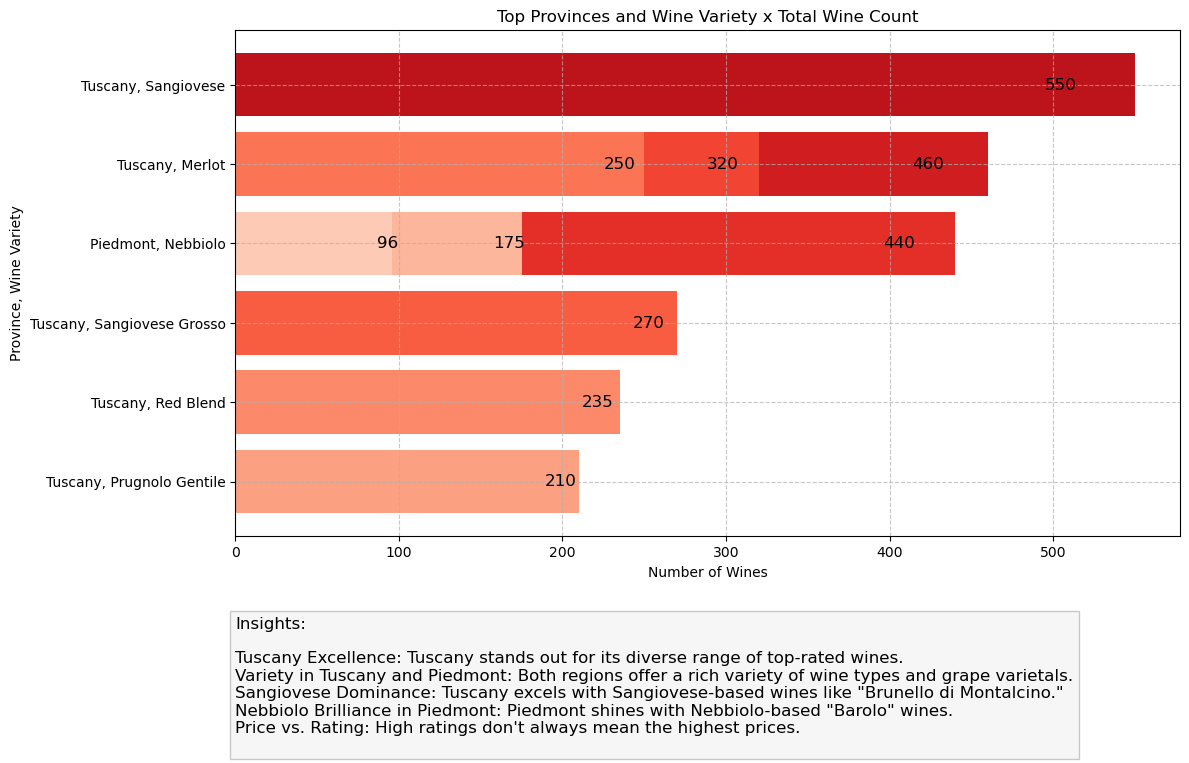

In [1198]:
# data as list of tuples
data_points90_100 = [
    (45781, "Italy", "Tuscany", "Brunello di Montalcino", "Sangiovese", 100, 550.0),
    (39286, "Italy", "Tuscany", "Toscana", "Merlot", 100, 460.0),
    (111754, "Italy", "Tuscany", "Brunello di Montalcino", "Sangiovese Grosso", 100, 270.0),
    (7335, "Italy", "Tuscany", "Vin Santo di Montepulciano", "Prugnolo Gentile", 100, 210.0),
    (79104, "Italy", "Tuscany", "Toscana", "Merlot", 99, 250.0),
    (39287, "Italy", "Tuscany", "Toscana", "Merlot", 99, 320.0),
    (35517, "Italy", "Tuscany", "Bolgheri Sassicaia", "Red Blend", 99, 235.0),
    (45573, "Italy", "Piedmont", "Barolo", "Nebbiolo", 99, 175.0),
    (44994, "Italy", "Piedmont", "Barolo", "Nebbiolo", 99, 595.0),
    (82750, "Italy", "Tuscany", "Vin Santo di Montepulciano", "Prugnolo Gentile", 99, 237.0),
    (60880, "Italy", "Piedmont", "Langhe", "Nebbiolo", 99, 440.0),
    (122936, "Italy", "Tuscany", "Brunello di Montalcino", "Sangiovese", 99, 200.0),
    (60881, "Italy", "Piedmont", "Langhe", "Nebbiolo", 99, 440.0),
    (122937, "Italy", "Tuscany", "Brunello di Montalcino", "Sangiovese", 98, 95.0),
    (45782, "Italy", "Tuscany", "Brunello di Montalcino", "Sangiovese", 98, 190.0),
    (16772, "Italy", "Piedmont", "Barolo", "Nebbiolo", 98, 151.0),
    (79105, "Italy", "Tuscany", "Bolgheri Superiore", "Red Blend", 98, 175.0),
    (16771, "Italy", "Piedmont", "Barolo", "Nebbiolo", 98, 70.0),
    (121933, "Italy", "Piedmont", "Barolo", "Nebbiolo", 98, 83.0),
    (1561, "Italy", "Tuscany", "Bolgheri Superiore", "Red Blend", 98, 102.0),
    (16773, "Italy", "Piedmont", "Barolo", "Nebbiolo", 98, 300.0),
    (16770, "Italy", "Piedmont", "Barolo", "Nebbiolo", 98, 60.0),
    (45783, "Italy", "Tuscany", "Brunello di Montalcino", "Sangiovese", 98, 120.0),
    (26889, "Italy", "Tuscany", "Bolgheri Sassicaia", "Red Blend", 98, 235.0),
    (60882, "Italy", "Piedmont", "Langhe", "Nebbiolo", 98, 255.0),
    (16523, "Italy", "Piedmont", "Barolo", "Nebbiolo", 97, 75.0),
    (39291, "Italy", "Tuscany", "Toscana", "Merlot", 97, 460.0),
    (121935, "Italy", "Piedmont", "Barolo", "Nebbiolo", 97, 96.0),
    (45801, "Italy", "Tuscany", "Bolgheri Superiore", "Red Blend", 97, 200.0),
    (119642, "Italy", "Piedmont", "Barbaresco", "Nebbiolo", 97, 58.0),
    (81899, "Italy", "Piedmont", "Langhe", "Nebbiolo", 97, 215.0),
    (109409, "Italy", "Tuscany", "Toscana", "Merlot", 97, 134.0),
    (117317, "Italy", "Tuscany", "Brunello di Montalcino", "Sangiovese", 97, 152.0),
    (119641, "Italy", "Piedmont", "Barolo", "Nebbiolo", 97, 82.0),
    (109408, "Italy", "Tuscany", "Toscana", "Red Blend", 97, 81.0),
    (54299, "Italy", "Southern Italy", "Taurasi", "Aglianico", 97, 90.0),
    (15831, "Italy", "Tuscany", "Brunello di Montalcino", "Sangiovese", 97, 125.0),
    (45991, "Italy", "Piedmont", "Barolo", "Nebbiolo", 97, 96.0),
    (45785, "Italy", "Tuscany", "Brunello di Montalcino", "Sangiovese", 97, 450.0),
    (45786, "Italy", "Tuscany", "Brunello di Montalcino", "Sangiovese", 97, 290.0),
    (45787, "Italy", "Tuscany", "Brunello di Montalcino", "Sangiovese", 97, 100.0),
    (45789, "Italy", "Tuscany", "Brunello di Montalcino", "Sangiovese", 97, 70.0),
    (45790, "Italy", "Tuscany", "Brunello di Montalcino", "Sangiovese", 97, 140.0),
    (108648, "Italy", "Tuscany", "Bolgheri Superiore", "Red Blend", 97, 240.0),
    (120275, "Italy", "Tuscany", "Brunello di Montalcino", "Sangiovese", 97, 80.0),
    (35519, "Italy", "Tuscany", "Toscana", "Red Blend", 97, 325.0),
    (119644, "Italy", "Piedmont", "Barolo", "Nebbiolo", 97, 55.0),
    (79107, "Italy", "Tuscany", "Toscana", "Red Blend", 97, 100.0),
    (119646, "Italy", "Piedmont", "Barolo", "Nebbiolo", 97, 375.0),
]


# Create a list of tuples containing province, variety, and count
province_variety_counts = [(province, variety, count) for _, _, province, _, variety, _, count in data_points90_100 if count is not None]

# Count the occurrences of each province-variety combination
province_variety_counts = Counter(province_variety_counts)

# Select the top 10 province-variety combinations
top_10 = province_variety_counts.most_common(10)

# Extract province, variety, and counts
provinces_varieties = [f"{province}, {variety}" for (province, variety, _), count in top_10]
counts = [int(count) for (_, _, count), _ in top_10]  # Convert counts to integers

# Sort the data by counts in descending order
provinces_varieties, counts = zip(*sorted(zip(provinces_varieties, counts), key=lambda x: x[1], reverse=True))

# Define a gradient of red colors in reverse order
num_shades = 10
red_colors = plt.cm.Reds(np.linspace(0.8, 0.2, num_shades))  # Reverse order

# Create the bar chart with custom colors and without decimal numbers inside the bars
plt.figure(figsize=(12, 6))
bars = plt.barh(provinces_varieties, counts, color=red_colors)
plt.xlabel('Number of Wines')
plt.ylabel('Province, Wine Variety')
plt.title('Top Provinces and Wine Variety x Total Wine Count')

# Add a grid
plt.grid(True, linestyle='--', alpha=0.7)

# Invert the Y-axis
plt.gca().invert_yaxis()

# Add labels for the number of wines inside the bars (larger and bold)
for i, bar in enumerate(bars):
    plt.text(bar.get_width() - bar.get_width() * 0.1, bar.get_y() + bar.get_height() / 2, counts[i],
             ha='left', va='center', color='black', fontsize=12)

# Create a box with text below the graph
insights_text = '''Insights:

Tuscany Excellence: Tuscany stands out for its diverse range of top-rated wines.
Variety in Tuscany and Piedmont: Both regions offer a rich variety of wine types and grape varietals.
Sangiovese Dominance: Tuscany excels with Sangiovese-based wines like "Brunello di Montalcino."
Nebbiolo Brilliance in Piedmont: Piedmont shines with Nebbiolo-based "Barolo" wines.
Price vs. Rating: High ratings don't always mean the highest prices.
'''

# Position the text box below the graph without affecting graph size
plt.figtext(0.2, -0.15, insights_text, bbox=dict(facecolor="lightgray", alpha=0.2), fontsize=12, ha='left', va='center')

# Show the plot
plt.tight_layout()
plt.show()

### 50 highest-rated wines from Tuscany - Points over 90

In [1199]:
# filters the Italian wines from Tuscany or Piemonte with points above 90 and then selects the top 50 based on points
top_50_italian_wines_tuscany = italian_wines[(italian_wines['country'] == 'Italy') & ((italian_wines['province'] == 'Tuscany')) & (italian_wines['points'] > 90)].nlargest(50, 'points')

top_50_italian_wines_tuscany

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
7335,7335,Italy,Thick as molasses and dark as caramelized brow...,Occhio di Pernice,100,210.0,Tuscany,Vin Santo di Montepulciano,unknown,unknown,unknown,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile,Avignonesi
39286,39286,Italy,"A perfect wine from a classic vintage, the 200...",Masseto,100,460.0,Tuscany,Toscana,unknown,unknown,unknown,Tenuta dell'Ornellaia 2007 Masseto Merlot (Tos...,Merlot,Tenuta dell'Ornellaia
45781,45781,Italy,"This gorgeous, fragrant wine opens with classi...",Riserva,100,550.0,Tuscany,Brunello di Montalcino,unknown,Kerin O’Keefe,@kerinokeefe,Biondi Santi 2010 Riserva (Brunello di Montal...,Sangiovese,Biondi Santi
111754,111754,Italy,It takes only a few moments before you appreci...,Cerretalto,100,270.0,Tuscany,Brunello di Montalcino,unknown,unknown,unknown,Casanova di Neri 2007 Cerretalto (Brunello di...,Sangiovese Grosso,Casanova di Neri
35517,35517,Italy,"One of Italy's most iconic bottlings, the 2012...",Sassicaia,99,235.0,Tuscany,Bolgheri Sassicaia,unknown,Kerin O’Keefe,@kerinokeefe,Tenuta San Guido 2012 Sassicaia (Bolgheri Sas...,Red Blend,Tenuta San Guido
39287,39287,Italy,Here's a “wow” wine you won't easily forget. M...,Messorio,99,320.0,Tuscany,Toscana,unknown,unknown,unknown,Le Macchiole 2007 Messorio Merlot (Toscana),Merlot,Le Macchiole
79104,79104,Italy,Even better than the highly acclaimed 2001 vin...,Masseto,99,250.0,Tuscany,Toscana,unknown,unknown,unknown,Tenuta dell'Ornellaia 2004 Masseto Merlot (Tos...,Merlot,Tenuta dell'Ornellaia
82750,82750,Italy,This sweet wine from Italy is guaranteed to bl...,Occhio di Pernice,99,237.0,Tuscany,Vin Santo di Montepulciano,unknown,unknown,unknown,Avignonesi 1997 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile,Avignonesi
122936,122936,Italy,"Perfumed berry, rose, new leather and dark spi...",Madonna delle Grazie,99,200.0,Tuscany,Brunello di Montalcino,unknown,Kerin O’Keefe,@kerinokeefe,Il Marroneto 2012 Madonna delle Grazie (Brune...,Sangiovese,Il Marroneto
1561,1561,Italy,"Here's a “wow” wine on every level, with incre...",Guado al Tasso,98,102.0,Tuscany,Bolgheri Superiore,unknown,unknown,unknown,Marchesi Antinori 2008 Guado al Tasso (Bolghe...,Red Blend,Marchesi Antinori


### Cost(Price) x Benefit(Points) Wines from Tuscany
#### Pandas DataFrame Visualization

In [1200]:
# Data for cheapest provinces/wine variety
cheapest_data1 = {
    'Province/ Wine Variery': ['Tuscany, Chianti Classico', 'Tuscany, Bolgheri Superiore', 'Tuscany, Brunello di Montalcino', 'Tuscany, Vin Santo di Montepulciano', 'Tuscany, Bolgheri Sassicaia'],
    'Average Price': [63.00, 167.83, 197.58, 205.67, 221.40]
}

# Data for highest points provinces/wine variety
highest_points_data1 = {
    'Province/ Wine Variety': ['Tuscany, Vin Santo di Montepulciano', 'Tuscany, Toscana', 'Tuscany, Brunello di Montalcino', 'Tuscany, Bolgheri Sassicaia', 'Tuscany, Bolgheri Superiore'],
    'Highest Points': [100, 100, 100, 99, 98]
}

# Create DataFrames
cheapest_df1 = pd.DataFrame(cheapest_data1)
highest_points_df1 = pd.DataFrame(highest_points_data1)

# Concatenate the DataFrames
result_df = pd.concat([cheapest_df1, highest_points_df1], axis=1)

# Display the result
result_df

,Province/ Wine Variery,Average Price,Province/ Wine Variety,Highest Points
0,"Tuscany, Chianti Classico",63.00,"Tuscany, Vin Santo di Montepulciano",100
1,"Tuscany, Bolgheri Superiore",167.83,"Tuscany, Toscana",100
2,"Tuscany, Brunello di Montalcino",197.58,"Tuscany, Brunello di Montalcino",100
3,"Tuscany, Vin Santo di Montepulciano",205.67,"Tuscany, Bolgheri Sassicaia",99
4,"Tuscany, Bolgheri Sassicaia",221.40,"Tuscany, Bolgheri Superiore",98


### Cost(Price) x Benefit(Points) wines from Tuscany
#### Graphic Visualization

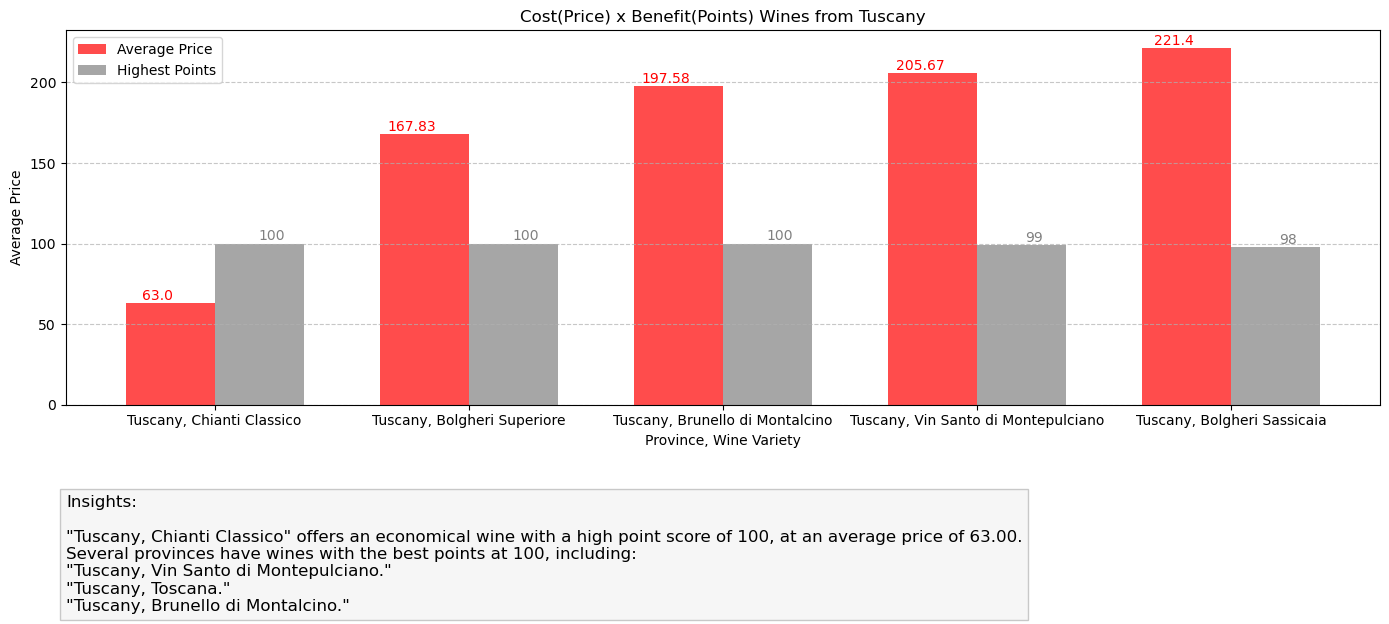

In [1201]:
# Data as list of tuples
wines_t = [
    ("Tuscany, Chianti Classico", 63.00, 100),
    ("Tuscany, Bolgheri Superiore", 167.83, 100),
    ("Tuscany, Brunello di Montalcino", 197.58, 100),
    ("Tuscany, Vin Santo di Montepulciano", 205.67, 99),
    ("Tuscany, Bolgheri Sassicaia", 221.40, 98)
]

# Unpack data
names, avg_price, highest_points = zip(*wines_t)

# Number of wines
num_wines = len(wines_t)

# Create an array for the x-axis positions
x = np.arange(num_wines)

# Width of each bar
width = 0.35

# Create a figure with a specified size
plt.figure(figsize=(14, 7))

# Plot Average Price bars
avg_price_bars = plt.bar(x - width/2, avg_price, width, label='Average Price', color='red', alpha=0.7)

# Plot Highest Points bars
highest_points_bars = plt.bar(x + width/2, highest_points, width, label='Highest Points', color='grey', alpha=0.7)

# X-axis labels
plt.xticks(x, names, rotation=0, ha="center")

# Add labels and title
plt.xlabel('Province, Wine Variety')
plt.ylabel('Average Price')
plt.title('Cost(Price) x Benefit(Points) Wines from Tuscany')

# Add legend
plt.legend()

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add values inside the bars
for bar1, bar2 in zip(avg_price_bars, highest_points_bars):
    plt.text(bar1.get_x() + bar1.get_width() / 2 - 0.05, bar1.get_height() + 2, str(bar1.get_height()), ha='center', color='red', fontsize=10)
    plt.text(bar2.get_x() + bar2.get_width() / 2 + 0.05, bar2.get_height() + 2, str(bar2.get_height()), ha='center', color='grey', fontsize=10)

# Create a box with text below the graph
insights_text = '''Insights:

"Tuscany, Chianti Classico" offers an economical wine with a high point score of 100, at an average price of 63.00.
Several provinces have wines with the best points at 100, including:
"Tuscany, Vin Santo di Montepulciano."
"Tuscany, Toscana."
"Tuscany, Brunello di Montalcino."'''

plt.annotate(insights_text,
             xy=(0.00, -0.4), xycoords='axes fraction',
             bbox=dict(facecolor="lightgray", alpha=0.2),
             fontsize=12, ha='left', va='center')

# Show the plot
plt.tight_layout()
plt.show()


## Saving relevant analysis into CSV file
### Saving  insights of "Cost(Price) x Benefit(Points) Wines from Tuscany" into a CSV on my local machine
#### Saving on a dedicated folder... table as CSV file, graphic as an image file, and insight as a notepad file.


In [1172]:
# Define the wines_t data
wines_t = [
    ("Tuscany, Chianti Classico", 63.00, 100),
    ("Tuscany, Bolgheri Superiore", 167.83, 100),
    ("Tuscany, Brunello di Montalcino", 197.58, 100),
    ("Tuscany, Vin Santo di Montepulciano", 205.67, 99),
    ("Tuscany, Bolgheri Sassicaia", 221.40, 98)
]

# Create a dedicated folder for the files if it doesn't exist
folder_name = "tuscany_wine_cost.vs.points"
os.makedirs(folder_name, exist_ok=True)

# Saving the wines_t data as a CSV file in the folder
df_t_t = pd.DataFrame(wines_t, columns=["Wine", "Average Price", "Highest Points"])
csv_filename = os.path.join(folder_name, "tuscany_wine_cost.vs.points.csv")
df_t_t.to_csv(csv_filename, index=False)

# Specify the folder path for saving the image
image_folder = os.path.join(folder_name, "images")
os.makedirs(image_folder, exist_ok=True)

# Saving the graph as an image in the folder without displaying it
plt.figure(figsize=(18, 7))

# code for plotting the graph and creating the wines_t array goes here

avg_price_bars = plt.bar(x - width/2, avg_price, width, label='Average Price', color='red', alpha=0.7)
highest_points_bars = plt.bar(x + width/2, highest_points, width, label='Highest Points', color='grey', alpha=0.7)
plt.xticks(x, names, rotation=0, ha="center")
plt.xlabel('Province, Wine Variety')
plt.ylabel('Average Price')
plt.title('Cost(Price) x Benefit(Points) Wines from Tuscany')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar1, bar2 in zip(avg_price_bars, highest_points_bars):
    plt.text(bar1.get_x() + bar1.get_width() / 2 - 0.05, bar1.get_height() + 2, str(bar1.get_height()), ha='center', color='red', fontsize=10)
    plt.text(bar2.get_x() + bar2.get_width() / 2 + 0.05, bar2.get_height() + 2, str(bar2.get_height()), ha='center', color='grey', fontsize=10)

insights_text = '''Insights:

"Tuscany, Chianti Classico" offers an economical wine with a high point score of 100, at an average price of 63.00.
Several provinces have wines with the best points at 100, including:
"Tuscany, Vin Santo di Montepulciano."
"Tuscany, Toscana."
"Tuscany, Brunello di Montalcino."'''

# Save the insights text to a text file
insights_filename = os.path.join(folder_name, "insights_tuscany_wine_cost.vs.points.txt")
with open(insights_filename, "w") as f:
    f.write(insights_text)

plt.annotate(insights_text,
             xy=(0.00, -0.4), xycoords='axes fraction',
             bbox=dict(facecolor="lightgray", alpha=0.2),
             fontsize=12, ha='left', va='center')

# Save the graph as an image
image_filename = os.path.join(image_folder, "tuscany_wine_cost.vs.points.png")
plt.savefig(image_filename)

# Close the figure to prevent it from being displayed
plt.close()

# Display a message in Jupyter Notebook
print(f"Files saved in the folder '{folder_name}':")
print(f"- {csv_filename} (CSV)")
print(f"- {image_filename} (Image)")
print(f"- {insights_filename} (Insights)")


Files saved in the folder 'tuscany_wine_cost.vs.points':
- tuscany_wine_cost.vs.points\tuscany_wine_cost.vs.points.csv (CSV)
- tuscany_wine_cost.vs.points\images\tuscany_wine_cost.vs.points.png (Image)
- tuscany_wine_cost.vs.points\insights_tuscany_wine_cost.vs.points.txt (Insights)


## Emailing the CSV file to someone
### Sending through gmail, as gmail sender.

In [1117]:
import smtplib  # For sending emails
from email.mime.multipart import MIMEMultipart  # For creating multipart emails
from email.mime.text import MIMEText  # For adding text content to emails
from email.mime.base import MIMEBase  # For adding binary attachments to emails
from email import encoders  # For encoding attachments

# Email configuration
sender_email = 'jeff.farias@gmail.com'  # Gmail email address
sender_password = ''  # Gmail App Password - Hidden for security reasons
recipient_email = 'jeff.farias@gmail.com'  # Recipient's email address
subject = 'Cost(Price) x Benefit(Points) Wines from Tuscany'  # Email subject
body = '''Hi!
I am jeff, and this is a test!
This email was sent by Python!
Please find attached a Cost(Price) x Benefit(Points) Wines from Tuscany analysis.
There are 3 files: CSV, Image, and insights.
Best Regards,
Jeff'''  # Email body

# Create the email message
msg = MIMEMultipart()  # Create a multipart message
msg['From'] = sender_email  # Set the sender's email address
msg['To'] = recipient_email  # Set the recipient's email address
msg['Subject'] = subject  # Set the email subject
msg.attach(MIMEText(body, 'plain'))  # Attach the email body as plain text

# Attach files
attachments = [
    'tuscany_wine_cost.vs.points/tuscany_wine_cost.vs.points.csv',
    'tuscany_wine_cost.vs.points/insights_tuscany_wine_cost.vs.points.txt',
    'tuscany_wine_cost.vs.points/images/tuscany_wine_cost.vs.points.png'
]

for file in attachments:
    part = MIMEBase('application', 'octet-stream')  # Create a base MIME attachment
    part.set_payload(open(file, 'rb').read())  # Load the file content
    encoders.encode_base64(part)  # Encode the attachment
    part.add_header('Content-Disposition', f'attachment; filename={file}')  # Set attachment filename
    msg.attach(part)  # Attach the file to the email message

# Connect to the SMTP server (Gmail in this example) and send the email
try:
    server = smtplib.SMTP('smtp.gmail.com', 587)  # Connect to the SMTP server (Gmail in this example)
    server.starttls()  # Start TLS encryption for secure communication
    server.login(sender_email, sender_password)  # Log in to your Gmail account
    text = msg.as_string()  # Convert the email message to a string
    server.sendmail(sender_email, recipient_email, text)  # Send the email
    server.quit()  # Quit the SMTP server
    print("Email sent successfully!")
except Exception as e:
    print(f"Error: {e}")  # Handle any exceptions that may occur during the process


Email sent successfully!
